**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ GETTING LIBRARIES AND DEPENDENCIES: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold
from sklearn import tree, metrics
from sklearn import model_selection
%matplotlib inline

#@ IGNORING WARNINGS: 
import warnings
warnings.filterwarnings("ignore")

**GETTING THE DATASET:**

In [3]:
#@ GETTING THE DATASET: 
data = datasets.fetch_openml("mnist_784",version=1,return_X_y=True)     # Getting the Dataset. 
pixel_values, targets = data                                            # Initializing Features and Targets. 
targets = targets.astype(int)                                           # Converting into Integers. 

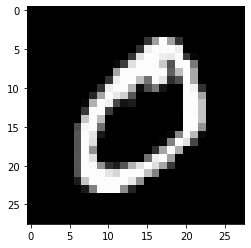

In [4]:
#@ VISUALIZING THE SAMPLES: 
single_image = pixel_values[1, :].reshape(28, 28)                       # Initializing an Image. 
plt.imshow(single_image, cmap="gray");                                  # Visualizing an Image. 

**TSNE DECOMPOSITION:**
- It is a method of visualizing **Unsupervised** dataset. 

In [5]:
#@ INITIALIZING TSNE DECOMPOSITION: 
tsne = manifold.TSNE(n_components=2, random_state=42)           # Initializing TSNE. 
transformed_data = tsne.fit_transform(pixel_values[:3000, :])   # Initializing Transformed Data. 

In [6]:
#@ INITIALIZING PANDAS DATAFRAME: 
tsne_df = pd.DataFrame(                                         # Initializing DataFrame. 
    np.column_stack((transformed_data, targets[:3000])), 
    columns=["x", "y", "targets"])                              # Initializing Columns. 
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)         # Converting into Integers. 
tsne_df.head(3)                                                 # Inspecting DataFrame. 

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4


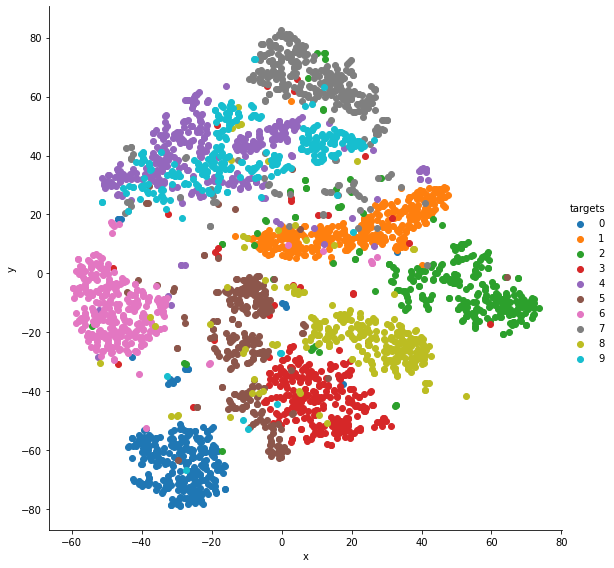

In [7]:
#@ PLOTTING THE TRANSFORMED SAMPLES: 
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)             # Initialization. 
grid.map(plt.scatter, "x", "y").add_legend();                    # Plotting. 

**CROSS VALIDATION:**
- **Cross Validation** is a step in the process of building a machine learning model which helps us to ensure that our models fit the data accurately and also ensures that we do not overfit. 

In [8]:
#@ GETTING THE DATASET: 
PATH = "/content/drive/MyDrive/AAML/winequality-red.csv"   # Path to the Dataset. 
df = pd.read_csv(PATH, low_memory=False)                   # Initializing DataFrame. 
df.head(4)                                                 # Inspecting DataFrame. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [9]:
#@ PREPARING THE DATASET: 
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}           # Initializing Mapping Dictionary. 
df.loc[:, "quality"] = df.quality.map(quality_mapping)     # Mapping Quality Values. 
df.head(4)                                                 # Inspecting DataFrame. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3


In [10]:
#@ SPLITTING THE DATASET: 
df = df.sample(frac=1).reset_index(drop=True)              # Shuffling the Dataset. 
df_train = df.head(1000)                                   # Initializing Training DataFrame. 
df_test = df.tail(599)                                     # Initializing Test DataFrame. 

**DECISION TREE MODEL:**

In [11]:
#@ INITIALIZING DECISION TREE MODEL: 
clf = tree.DecisionTreeClassifier(max_depth=3)                          # Initializing Decision Tree Classifier. 
cols = ["fixed acidity", "volatile acidity", "citric acid", 
        "residual sugar", "chlorides", "free sulfur dioxide", 
        "density","pH","sulphates","alcohol","total sulfur dioxide"]    # Initializing Features. 
clf.fit(df_train[cols], df_train.quality)                               # Training the Classifier. 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
#@ MODEL EVALUATION: ACCURACY: 
train_predictions = clf.predict(df_train[cols])                         # Predictions on Training Set. 
test_predictions = clf.predict(df_test[cols])                           # Predictions on Test Set. 
train_accuracy = metrics.accuracy_score(df_train.quality, 
                                        train_predictions)              # Getting Training Accuracy. 
test_accuracy = metrics.accuracy_score(df_test.quality, 
                                       test_predictions)                # Getting Test Accuracy. 
train_accuracy, test_accuracy                                           # Inspection. 

(0.595, 0.5776293823038398)

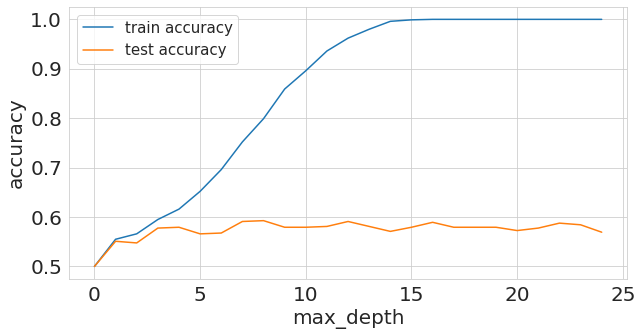

In [13]:
#@ VISUALIZING ACCURACIES OF MODEL: 
matplotlib.rc("xtick", labelsize=20)                          # Size of Label Text. 
matplotlib.rc("ytick", labelsize=20)                          # Size of Label Text. 
train_accuracies = [0.5]                                      # Initializing List. 
test_accuracies = [0.5]                                       # Initializing List. 
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)                      # Initializing Decision Tree Classifier. 
    cols = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "density","pH","sulphates","alcohol","total sulfur dioxide"]    # Initializing Features. 
    clf.fit(df_train[cols], df_train.quality)                               # Training the Classifier. 
    #@ MODEL EVALUATION: ACCURACY: 
    train_predictions = clf.predict(df_train[cols])                         # Predictions on Training Set. 
    test_predictions = clf.predict(df_test[cols])                           # Predictions on Test Set. 
    train_accuracy = metrics.accuracy_score(df_train.quality, 
                                            train_predictions)              # Getting Training Accuracy. 
    test_accuracy = metrics.accuracy_score(df_test.quality, 
                                        test_predictions)                   # Getting Test Accuracy. 
    #@ GETTING ACCURACIES: 
    train_accuracies.append(train_accuracy)                                 # Appending Training Accuracy. 
    test_accuracies.append(test_accuracy)                                   # Appending Test Accuracy. 

#@ GENERATING PLOTS: 
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper", prop={"size": 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

Text(0, 0.5, 'count')

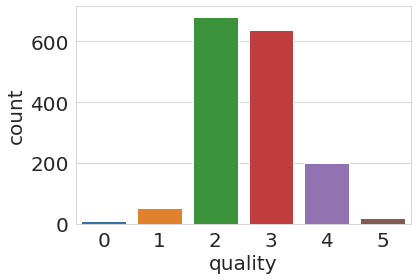

In [15]:
#@ INSPECTING DISTRIBUTION OF LABELS: 
b = sns.countplot(x="quality", data=df)             # Initializing Count Plot. 
b.set_xlabel("quality", fontsize=20)                # Initializing Labels. 
b.set_ylabel("count", fontsize=20)                  # Initializing Labels. 

**REGRESSION PROBLEM:**

In [17]:
#@ INITIALIZING STRATIFIED KFOLD FOR REGRESSION: 
def create_folds(data):                                     # Defining the Function. 
    data["kfold"] = -1                                      # Initializing a Column. 
    data = data.sample(frac=1).reset_index(drop=True)       # Randomizing Rows of Data. 
    num_bins = int(np.floor(1 + np.log2(len(data))))        # Initializing Bins using Sturge's Rule. 
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False)        # Initializing Bin Targets. 
    kf = model_selection.StratifiedKFold(n_splits=5)        # Initializing KFold Class. 
    for f,(t_,v_) in enumerate(
        kf.split(X=data,y=data.bins.values)):
        data.loc[v_,"kfold"] = f
    data = data.drop("bins", axis=1)                        # Dropping Bins Column. 
    return data

if __name__ == "__main__":
    X, y = datasets.make_regression(
        n_samples=15000,n_features=100,n_targets=1)         # Initializing Sample Dataset. 
    df = pd.DataFrame(
        X,  columns=[f"f_{i}" for i in range(X.shape[1])])  # Initializing a DataFrame. 
    df.loc[:, "target"] = y                                 # Initializing Target. 
    df = create_folds(df)                                   # Creating Folds. 

In [18]:
#@ INSPECTING DATAFRAME: 
df.head(3)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-0.256831,1.438085,-0.254912,2.361002,1.316372,0.411097,-0.416206,2.232360,1.394499,-1.415213,0.058791,0.265594,0.923031,0.722603,0.190274,1.092491,-0.979915,-0.062307,1.055533,0.269221,-1.588069,0.065310,-1.281492,0.137261,0.177544,-0.298073,-0.918515,-1.323144,0.083642,0.520351,1.520569,-0.101596,-0.025459,-0.544933,1.141862,0.703988,-0.161034,0.144246,0.876932,-0.817266,...,-0.500727,-0.943752,0.264232,-0.375938,-1.021209,0.158136,-0.931199,0.622356,1.281221,-0.975164,-0.200303,-0.526918,-0.396997,0.422961,1.424895,0.996769,-2.400638,-0.820514,1.446587,-0.393653,-0.790964,-1.417049,-1.618834,-0.210880,0.128565,0.799151,-0.835646,1.566008,0.336056,0.431010,-0.451113,-0.002909,-0.772355,-1.655025,-0.901430,-0.457149,-0.050517,-2.087601,-174.110369,0
1,-0.595567,0.231607,-0.167985,0.455366,0.546975,0.116266,0.406313,-0.732537,-0.962470,-0.402769,-0.863964,-1.087372,-0.165484,-0.009196,0.479082,0.650610,-1.285899,-0.113521,-0.595601,1.876686,0.102847,0.336806,1.288650,-0.549928,-0.509398,0.224202,-1.630305,1.502154,0.362870,-1.761135,1.373865,-0.918703,-1.523212,0.465524,0.308246,-1.224384,-0.276578,0.303714,-0.145036,-1.109892,...,0.421213,0.111668,0.763168,-0.648246,0.647487,1.519099,0.955600,-0.267795,-0.436079,0.017467,-0.330493,-1.011842,1.605024,0.515214,3.085423,-1.304357,-0.552613,1.177323,1.451323,-2.057481,-0.480065,-1.968012,-0.816819,0.936252,2.052353,1.116173,0.114699,-0.290506,1.582829,1.506251,0.123624,-0.234480,-0.832348,-0.562965,0.780718,0.010417,2.361357,-1.502667,64.664667,0
2,-1.100096,-1.309668,0.235222,-1.146729,-0.934222,0.232423,0.759906,0.050164,-2.351953,-0.019405,0.755912,-1.648290,0.786086,-0.676250,0.669141,0.536913,-0.968262,0.743127,-0.500821,-0.160917,0.818071,1.046728,-0.379383,-0.556907,-0.903395,1.458631,-0.748977,0.137099,1.018022,-0.768634,0.503224,0.645037,0.036250,0.755714,-0.882425,0.302049,-1.748896,-0.638302,-0.249675,0.341722,...,-0.841142,1.045628,0.257451,-1.129363,-0.120191,-0.615705,0.692450,0.670586,1.625366,-0.192283,1.802630,-0.344235,-0.902248,0.570099,0.305222,-0.420134,0.170445,0.822307,-0.299693,0.078724,0.900199,-2.304643,-0.981801,0.019609,0.731746,0.198647,0.203776,-0.336548,-0.305251,-0.107326,-1.300125,-1.100263,-0.518232,-0.233222,-0.315953,-0.991039,1.146251,-1.729179,94.976619,0


In [19]:
#@ FUNCTION FOR CALCULATING ACCURACY: 
def accuracy(y_true, y_pred):                             # Defining Function. 
    correct_counter = 0                                   # Initializing Counter. 
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(y_true)                  # Getting Accuracy. 